In [112]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
# import warnings
# warnings.filterwarnings('ignore')

In [113]:
#sadi imports
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [114]:
#load data
admission_df = pd.read_csv("data/ADMISSIONS_full.csv")

In [119]:
#find which pacients have infection label
infections = ["UROSEPSIS", "HYPONATREMIA;URINARY TRACT INFECTION", "UTI/PYELONEPHRITIS", "SEPSIS;TELEMETRY", "SEPSIS", "FEVER;URINARY TRACT INFECTION", "URINARY TRACT INFECTION;PYELONEPHRITIS"]
admission_df['INFECTION_STATUS'] = 0
for infection in infections:
    admission_df.loc[admission_df['DIAGNOSIS'] == infection, "INFECTION_STATUS"] = 1

In [124]:
# drop unuseful/leaky data
drop_elements = ['HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'LANGUAGE', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME', 'HAS_CHARTEVENTS_DATA']
data_id = admission_df.drop(drop_elements, axis = 1).dropna()
data = data_id.drop(['ROW_ID', 'SUBJECT_ID'],axis=1) 

In [76]:
#get labels
y = data['INFECTION_STATUS']
X = data.drop(['INFECTION_STATUS'], axis=1)

#encode
from collections import defaultdict
d = defaultdict(LabelEncoder)
X = X.apply(lambda x: d[x.name].fit_transform(x))

In [17]:
#tt split + vanilla RF
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

Normalized confusion matrix
[[  9.99e-01   8.78e-04]
 [  7.70e-02   9.23e-01]]


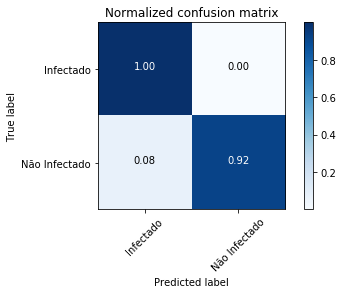

In [18]:
class_names = ['Infectado', 'Não Infectado']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Microbiology events

In [164]:
microb = pd.read_csv('./data/MICROBIOLOGYEVENTS_full.csv')

In [32]:
c_diff_ids = microb[microb['ORG_NAME'] == 'CLOSTRIDIUM DIFFICILE']['SUBJECT_ID'].drop_duplicates().values

array([   21,   195,   171, ..., 98593, 99783, 98853])

In [37]:
X = data.drop('INFECTION_STATUS', axis=1)
X

,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG
0,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,UNOBTAINABLE,WHITE,BENZODIAZEPINE OVERDOSE,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,BRAIN MASS,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,WHITE,INTERIOR MYOCARDIAL INFARCTION,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,UNOBTAINABLE,WHITE,ACUTE CORONARY SYNDROME,0
5,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,V-TACH,0
6,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,CATHOLIC,WHITE,NEWBORN,0
7,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
8,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,UNSTABLE ANGINA\CATH,0
9,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,CATHOLIC,WHITE,STATUS EPILEPTICUS,1


In [108]:
microbio_df = pd.read_csv('./data/MICROBIOLOGYEVENTS_full.csv')
cdiff_df = microbio_df.loc[microbio_df['ORG_NAME'] == 'CLOSTRIDIUM DIFFICILE']
d = pd.DataFrame()
for i in range(0, cdiff_df.shape[0]):
    a = admission_df['SUBJECT_ID'] == cdiff_df["SUBJECT_ID"].values[i]
    b = admission_df['ADMITTIME'] + ("48:00:00") <= cdiff_df["CHARTTIME"].values[i]
    c = cdiff_df["CHARTTIME"].values[i] <= admission_df['DISCHTIME'] 
    d = d.append(admission_df[a&b&c])

In [111]:
row_ids_cdiff = d['ROW_ID'] 

In [125]:
# labels from microbiology
y = [1 if (tup.ROW_ID in row_ids_cdiff) else 0 for tup in data_id.itertuples()]

In [ ]:
#IMBALANCED LEARNING CELL
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=31, ratio={0:2000, 1:1000})
from imblearn.under_sampling import RandomUnderSampler 
X_res, y_res = rus.fit_sample(X, y)

Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.78  0.22]]


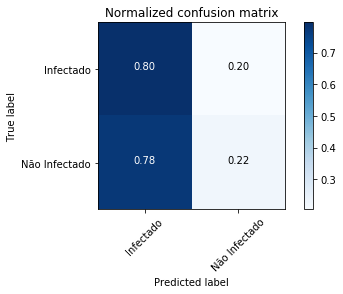

In [163]:
# X = X.drop(['DISCHARGE_LOCATION','HOSPITAL_EXPIRE_FLAG'], axis=1)
# X = X.drop(['HOSPITAL_EXPIRE_FLAG'], axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X_res, y_res, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()